In [99]:
# importações necessarias
 
import pandas as pd                                    # manipulação de dados
import numpy as np                                     # calculos matematicos
import seaborn as sns                                  # visualização grafica
import matplotlib.pyplot as plt                        # visualização grafica
from sklearn.compose import ColumnTransformer          # manipulação de colunas
from sklearn.preprocessing import LabelEncoder         # processamento de variaveis
from sklearn.preprocessing import OneHotEncoder        # processamento de variaveis
from sklearn.preprocessing import MinMaxScaler         # padronização de variaveis
from sklearn.metrics import accuracy_score             # avaliação do modelo
from sklearn.metrics import confusion_matrix           # avalicação do modelo
from sklearn.metrics import classification_report      # report modelo
from sklearn.model_selection import train_test_split   # divisao treino/teste dados
from sklearn.ensemble import RandomForestClassifier    # algoritmo RandomForest

In [100]:
# carregando base de dados

base_census = pd.read_csv('./data/census.csv')

In [101]:
# primeiros registros

base_census.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [102]:
# seleção de toda as colunas de previsão

colunas = base_census.columns[: -1]
colunas

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country'],
      dtype='object')

In [103]:
# seleção e transfomação em array

X_census = base_census.iloc[ :, 0:14].values
y_census = base_census.iloc[ :, 14].values

In [104]:
# # visualização apos tratamento

X_census

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [105]:
y_census

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [106]:
# tratamento nas variaveis categoricas com o LabelEncoder

label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_country = LabelEncoder()

X_census[ :, 1] = label_encoder_workclass.fit_transform(X_census[ :, 1])
X_census[ :, 3] = label_encoder_education.fit_transform(X_census[ :, 3])
X_census[ :, 5] = label_encoder_marital.fit_transform(X_census[ :, 5])
X_census[ :, 6] = label_encoder_occupation.fit_transform(X_census[ :, 6])
X_census[ :, 7] = label_encoder_relationship.fit_transform(X_census[ :, 7])
X_census[ :, 8] = label_encoder_race.fit_transform(X_census[ :, 8])
X_census[ :, 9] = label_encoder_sex.fit_transform(X_census[ :, 9])
X_census[ :, 13] = label_encoder_country.fit_transform(X_census[ :, 13])

In [107]:
# após tratamento

X_census

array([[39, 7, 77516, ..., 0, 40, 39],
       [50, 6, 83311, ..., 0, 13, 39],
       [38, 4, 215646, ..., 0, 40, 39],
       ...,
       [58, 4, 151910, ..., 0, 40, 39],
       [22, 4, 201490, ..., 0, 20, 39],
       [52, 5, 287927, ..., 0, 40, 39]], dtype=object)

In [108]:
# normalização MinMaxScale

sc = MinMaxScaler()
X_census_scaler = sc.fit_transform(X_census)
X_census_scaler

array([[0.30136986, 0.875     , 0.0443019 , ..., 0.        , 0.39795918,
        0.95121951],
       [0.45205479, 0.75      , 0.0482376 , ..., 0.        , 0.12244898,
        0.95121951],
       [0.28767123, 0.5       , 0.13811345, ..., 0.        , 0.39795918,
        0.95121951],
       ...,
       [0.56164384, 0.5       , 0.09482688, ..., 0.        , 0.39795918,
        0.95121951],
       [0.06849315, 0.5       , 0.12849934, ..., 0.        , 0.19387755,
        0.95121951],
       [0.47945205, 0.625     , 0.18720338, ..., 0.        , 0.39795918,
        0.95121951]])

In [109]:
# seleção de atributos 
# low variance

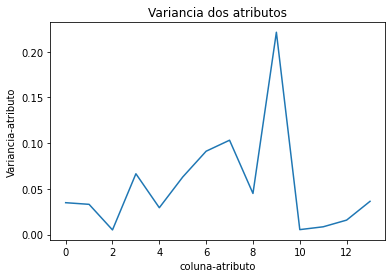

In [110]:
# visualização da variancia de cada coluna
var_col = []

for i in range(X_census_scaler.shape[1]):
    #print(X_census_scaler[i].var())
    var_col.append(X_census_scaler[:, i].var())


plt.plot(var_col)
plt.title('Variancia dos atributos')
plt.xlabel('coluna-atributo')
plt.ylabel('Variancia-atributo')
plt.show()

In [111]:
from sklearn.feature_selection import VarianceThreshold

In [112]:
# atributos que tem uma variancia muito pequena
# tem a tendencia de serem atributos parecidos
# atributos com a variancia muito pequenas estão muito perto da media

selecao = VarianceThreshold(threshold=0.05)
X_census_variancia = selecao.fit_transform(X_census_scaler)
X_census_variancia.shape

(32561, 5)

In [113]:
X_census_variancia

array([[0.6       , 0.66666667, 0.07142857, 0.2       , 1.        ],
       [0.6       , 0.33333333, 0.28571429, 0.        , 1.        ],
       [0.73333333, 0.        , 0.42857143, 0.2       , 1.        ],
       ...,
       [0.73333333, 1.        , 0.07142857, 0.8       , 0.        ],
       [0.73333333, 0.66666667, 0.07142857, 0.6       , 1.        ],
       [0.73333333, 0.33333333, 0.28571429, 1.        , 0.        ]])

In [114]:
selecao.variances_

array([0.03491381, 0.03312115, 0.00513854, 0.06657104, 0.02941639,
       0.06301762, 0.09123817, 0.10326534, 0.04502805, 0.2213695 ,
       0.0054542 , 0.00855727, 0.01587404, 0.03641266])

In [115]:
# threshold=0.05
# colunas selecionadas

indices = np.where(selecao.variances_ > 0.05)
indices

(array([3, 5, 6, 7, 9], dtype=int64),)

In [116]:
# nome das colunas

colunas[indices]

Index(['education', 'marital-status', 'occupation', 'relationship', 'sex'], dtype='object')

In [117]:
# treinamento com as variaveis selecionadas

In [118]:
# retirando as varivaies que não serão utilizadas

base_census_variancia = base_census.drop(columns = ['age', 'workclass', 'final-weight',
                                                    'education-num', 'race', 'capital-gain',
                                                    'capital-loos', 'hour-per-week', 
                                                    'native-country'], axis = 1)
base_census_variancia

,education,marital-status,occupation,relationship,sex,income
0,Bachelors,Never-married,Adm-clerical,Not-in-family,Male,<=50K
1,Bachelors,Married-civ-spouse,Exec-managerial,Husband,Male,<=50K
2,HS-grad,Divorced,Handlers-cleaners,Not-in-family,Male,<=50K
3,11th,Married-civ-spouse,Handlers-cleaners,Husband,Male,<=50K
4,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Female,<=50K
...,...,...,...,...,...,...
32556,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,Female,<=50K
32557,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,Male,>50K
32558,HS-grad,Widowed,Adm-clerical,Unmarried,Female,<=50K
32559,HS-grad,Never-married,Adm-clerical,Own-child,Male,<=50K


In [119]:
# seleção 

X_census_variancia = base_census_variancia.iloc[ :, 0:5].values
y_census_variancia = base_census_variancia.iloc[ :, 5].values

In [120]:
# visualização após tratamento

X_census_variancia

array([[' Bachelors', ' Never-married', ' Adm-clerical',
        ' Not-in-family', ' Male'],
       [' Bachelors', ' Married-civ-spouse', ' Exec-managerial',
        ' Husband', ' Male'],
       [' HS-grad', ' Divorced', ' Handlers-cleaners', ' Not-in-family',
        ' Male'],
       ...,
       [' HS-grad', ' Widowed', ' Adm-clerical', ' Unmarried', ' Female'],
       [' HS-grad', ' Never-married', ' Adm-clerical', ' Own-child',
        ' Male'],
       [' HS-grad', ' Married-civ-spouse', ' Exec-managerial', ' Wife',
        ' Female']], dtype=object)

In [121]:
y_census_variancia

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [122]:
# label encoder
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_sex = LabelEncoder()

X_census_variancia[:,0] = label_encoder_education.fit_transform(X_census_variancia[:,0])
X_census_variancia[:,1] = label_encoder_marital.fit_transform(X_census_variancia[:,1])
X_census_variancia[:,2] = label_encoder_occupation.fit_transform(X_census_variancia[:,2])
X_census_variancia[:,3] = label_encoder_relationship.fit_transform(X_census_variancia[:,3])
X_census_variancia[:,4] = label_encoder_sex.fit_transform(X_census_variancia[:,4])

In [123]:
X_census_variancia

array([[9, 4, 1, 1, 1],
       [9, 2, 4, 0, 1],
       [11, 0, 6, 1, 1],
       ...,
       [11, 6, 1, 4, 0],
       [11, 4, 1, 3, 1],
       [11, 2, 4, 5, 0]], dtype=object)

In [124]:
# oneHotEncoder

onehotencorder = ColumnTransformer(transformers=[("OneHot", OneHotEncoder(), [0,1,2,3,4])],remainder='passthrough')
X_census_variancia = onehotencorder.fit_transform(X_census_variancia).toarray()
X_census_variancia

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 1., 0.]])

In [125]:
# normalização

scaler = MinMaxScaler()
X_census_variancia = scaler.fit_transform(X_census_variancia)
X_census_variancia

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 1., 0.]])

In [126]:
# treino e teste

X_census_treinamento_var, X_census_teste_var, y_census_treinamento_var, y_census_teste_var = train_test_split(X_census_variancia, y_census_variancia, test_size=0.15, random_state=0)
X_census_treinamento_var.shape, X_census_teste_var.shape

((27676, 46), (4885, 46))

In [127]:
# 84.70
# modelo de randomForest

random_forest_var = RandomForestClassifier(criterion = 'entropy', min_samples_leaf =  1, min_samples_split = 5, n_estimators = 100)
random_forest_var.fit(X_census_treinamento_var, y_census_treinamento_var)

RandomForestClassifier(criterion='entropy', min_samples_split=5)

In [128]:
# avaliação

previsoes = random_forest_var.predict(X_census_teste_var)
accuracy_score(y_census_teste_var, previsoes)

0.8155578300921187

[[3396  297]
 [ 604  588]]


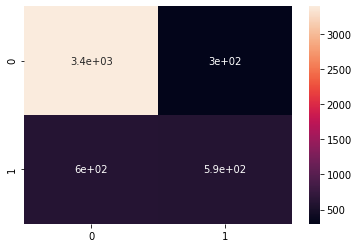

In [130]:
# matriz de confusão

cnn = confusion_matrix(y_census_teste_var, previsoes)
print(cnn)
sns.heatmap(cnn, annot=True);